In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_final=pd.read_csv(r'C:\Users\nkn05\OneDrive\Desktop\DL_proj\.venv\Data\df_final.csv')

In [3]:
df_final.head()

,customer_id,total_orders,days_since_last_order,average_order_value,completed_orders,canceled_orders,address_status_changed,shipping_method_preference,churn
0,2,1,1041,4.360,0,0,False,International,1
1,4,1,393,26.760,1,0,False,International,1
2,5,2,760,260.640,6,0,True,Express,1
3,6,4,397,134.824,8,0,False,Priority,1
4,7,1,544,125.360,2,0,False,Standard,1


Encode Categorical Variables:

In [4]:

# One-hot encode categorical features
df_final = pd.get_dummies(df_final, columns=['shipping_method_preference'], drop_first=True)

In [5]:
df_final

,customer_id,total_orders,days_since_last_order,average_order_value,completed_orders,canceled_orders,address_status_changed,churn,shipping_method_preference_International,shipping_method_preference_Priority,shipping_method_preference_Standard
0,2,1,1041,4.36000,0,0,False,1,True,False,False
1,4,1,393,26.76000,1,0,False,1,True,False,False
2,5,2,760,260.64000,6,0,True,1,False,False,False
3,6,4,397,134.82400,8,0,False,1,False,True,False
4,7,1,544,125.36000,2,0,False,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
1681,1989,9,220,111.51131,12,0,False,1,False,False,False
1682,1991,1,175,168.16000,4,0,True,1,False,True,False
1683,1994,2,21,109.89001,4,0,False,0,True,False,False
1684,1998,1,333,60.36000,1,0,False,1,False,False,False


Normalize/Scale Numerical Features:

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['total_orders', 'days_since_last_order', 'average_order_value', 'completed_orders', 'canceled_orders']
df_final[numerical_features] = scaler.fit_transform(df_final[numerical_features])

Separate Features and Target:

In [7]:
X = df_final.drop(columns=['churn', 'customer_id'])  # Features
y = df_final['churn']  # Target

Split Data into Training and Testing Sets:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print(y_train.value_counts()) 

churn
1    981
0    367
Name: count, dtype: int64


# Building ANN model

In [10]:
import tensorflow as tf


In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout


Define the ANN Architecture:

Input layer: Number of neurons = Number of features.

Hidden layers: Experiment with 1-3 hidden layers.

Output layer: 1 neuron (for binary classification) with a sigmoid activation function.

In [12]:
# Initialize the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))  # Dropout for regularization

# Second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1, activation='sigmoid'))

c:\Users\nkn05\OneDrive\Desktop\DL_proj\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model:

Use binary_crossentropy as the loss function (for binary classification).

Use adam as the optimizer.

Track accuracy as the evaluation metric

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the ANN model

Smote to handle imbalanced datset

In [14]:
from imblearn.over_sampling import SMOTE
from collections import Counter

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:", Counter(y_train_resampled))

# Train model with balanced data
model.fit(X_train_resampled, y_train_resampled)


Class distribution after SMOTE: Counter({1: 981, 0: 981})
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6368 - loss: 0.6247


Train the Model:

In [15]:
history = model.fit(
    X_train_resampled, y_train_resampled,
    epochs=50,  # Number of epochs
    batch_size=32,  # Batch size
    validation_data=(X_test, y_test),  # Validation data
    verbose=1  # Show progress
) 

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8247 - loss: 0.4303 - val_accuracy: 0.8580 - val_loss: 0.3152
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8765 - loss: 0.3273 - val_accuracy: 0.8817 - val_loss: 0.2656
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8780 - loss: 0.2717 - val_accuracy: 0.8876 - val_loss: 0.2266
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9089 - loss: 0.2363 - val_accuracy: 0.8994 - val_loss: 0.2116
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9069 - loss: 0.2238 - val_accuracy: 0.8994 - val_loss: 0.1948
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9140 - loss: 0.2041 - val_accuracy: 0.9053 - val_loss: 0.1710
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9277 - loss: 0.1708 - val_accuracy: 0.9349 - val_loss: 0.1450
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9441 - loss: 0.1528 - val_accuracy: 0.9290 - val_loss:

plot training and validation loss

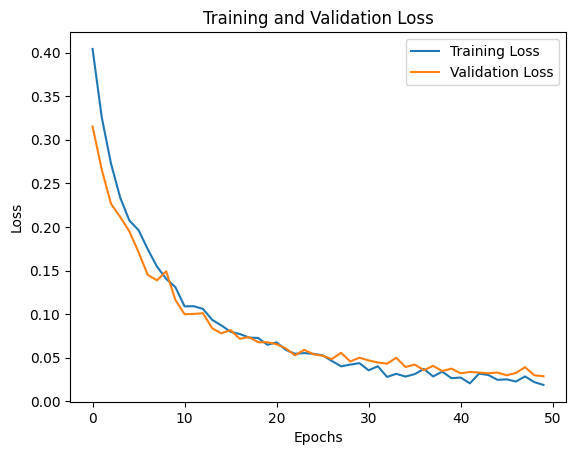

In [16]:
import matplotlib.pyplot as plt

# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plot Training and Validation Accuracy:

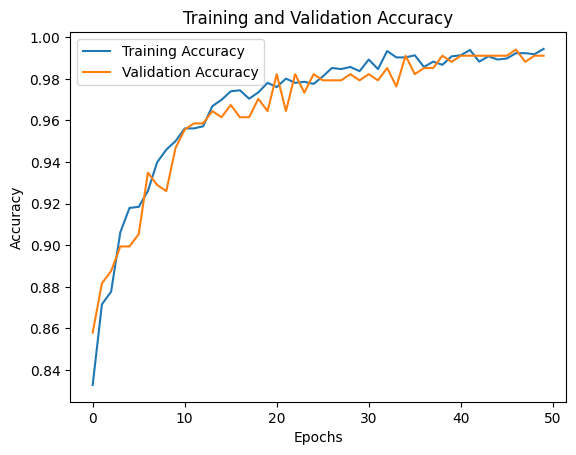

In [17]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

 # Evaluate the ANN Model

Make Predictions:

In [18]:
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


Calculate Evaluation Metrics:

Accuracy: 0.9911242603550295
Precision: 0.9959839357429718
Recall: 0.992
F1-Score: 0.9939879759519038


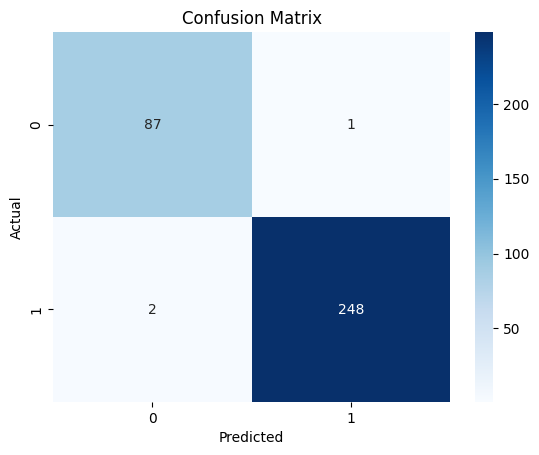

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Metrics
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-Score:', f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

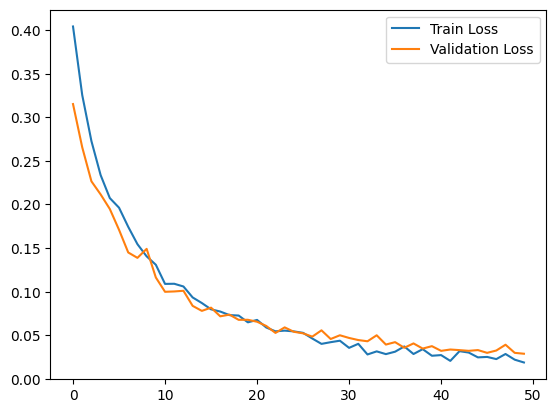

In [20]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [21]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[ 87   1]
 [  2 248]]


# Improve the ANN Model

In [22]:
# Class weighting
class_weights = {0: 1, 1: 2}  # Give more weight to the minority class
model.fit(X_train, y_train, class_weight=class_weights, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9919 - loss: 0.0327 - val_accuracy: 0.9704 - val_loss: 0.0559
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9911 - loss: 0.0346 - val_accuracy: 0.9882 - val_loss: 0.0295
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9893 - loss: 0.0312 - val_accuracy: 0.9822 - val_loss: 0.0327
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9888 - loss: 0.0334 - val_accuracy: 0.9911 - val_loss: 0.0281
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9849 - loss: 0.0438 - val_accuracy: 0.9822 - val_loss: 0.0329
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9863 - loss: 0.0366 - val_accuracy: 0.9911 - val_loss: 0.0260
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9934 - loss: 0.0312 - val_accuracy: 0.9911 - val_loss: 0.0253
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9911 - loss: 0.0279 - val_accuracy: 0.9852 - val_loss:

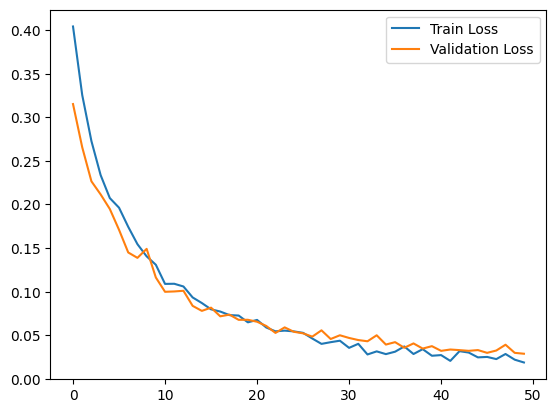

In [25]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()


In [23]:
print(y_train_resampled.value_counts())  # Ensure the dataset isn't heavily imbalanced


churn
1    981
0    981
Name: count, dtype: int64


Save the Model

In [24]:
#model.save('churn_prediction_ann_model.h5')